In [1]:
#Importing libraries
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM, SimpleRNN, Embedding
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.callbacks import ModelCheckpoint

import tensorflow as tf
import pandas as pd
import os, re, requests, tarfile, shutil, json, glob # For file manipualation only.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget https://dax-cdn.cdn.appdomain.cloud/dax-project-codenet/1.0.0/Project_CodeNet.tar.gz

--2022-03-10 05:37:38--  https://dax-cdn.cdn.appdomain.cloud/dax-project-codenet/1.0.0/Project_CodeNet.tar.gz
Resolving dax-cdn.cdn.appdomain.cloud (dax-cdn.cdn.appdomain.cloud)... 23.73.225.158, 2600:1402:b800:880::d2d, 2600:1402:b800:88f::d2d
Connecting to dax-cdn.cdn.appdomain.cloud (dax-cdn.cdn.appdomain.cloud)|23.73.225.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8343137473 (7.8G) [application/x-gtar]
Saving to: ‘Project_CodeNet.tar.gz’

Project_CodeNet.tar 100%[===================>]   7.77G  47.7MB/s    in 2m 24s  

2022-03-10 05:40:03 (55.1 MB/s) - ‘Project_CodeNet.tar.gz’ saved [8343137473/8343137473]



In [ ]:
!tar -xvf /content/Project_CodeNet.tar.gz  --directory /content/drive/MyDrive/code_completion_data/ --wildcards --no-anchored '*.py' 


Streaming output truncated to the last 5000 lines.
Project_CodeNet/data/p03453/Python/s355971994.py
Project_CodeNet/data/p03453/Python/s646825175.py
Project_CodeNet/data/p03453/Python/s995413113.py
Project_CodeNet/data/p03453/Python/s281521797.py
Project_CodeNet/data/p03453/Python/s295923419.py
Project_CodeNet/data/p03453/Python/s571841195.py
Project_CodeNet/data/p03453/Python/s877635731.py
Project_CodeNet/data/p03453/Python/s285032486.py
Project_CodeNet/data/p03453/Python/s204575413.py
Project_CodeNet/data/p03453/Python/s667045189.py
Project_CodeNet/data/p03453/Python/s942524155.py
Project_CodeNet/data/p03453/Python/s666889390.py
Project_CodeNet/data/p03453/Python/s863780700.py
Project_CodeNet/data/p03453/Python/s246987591.py
Project_CodeNet/data/p03453/Python/s035557555.py
Project_CodeNet/data/p03453/Python/s447966948.py
Project_CodeNet/data/p03453/Python/s634303776.py
Project_CodeNet/data/p03453/Python/s705246100.py
Project_CodeNet/data/p03453/Python/s818550909.py
Project_CodeNet/da

In [5]:
#Using tokens on the vocabulary
import keras
import json

with open("drive/MyDrive/code_completion_data/samples/tokenizer.json") as f:
  json_string = json.load(f)

tokenizer = keras.preprocessing.text.tokenizer_from_json(
    json_string
)

In [4]:
import glob
path = r'drive/MyDrive/code_completion_data/samples/'
all_files = glob.glob(path + "/val*.csv")
all_files += glob.glob(path + "/t*.csv")

li = []

for filename in all_files:
  print(filename)

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

drive/MyDrive/code_completion_data/samples/val1.csv
drive/MyDrive/code_completion_data/samples/val2.csv
drive/MyDrive/code_completion_data/samples/train.csv
drive/MyDrive/code_completion_data/samples/test.csv


In [4]:
frame.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,sample,submission_id,status,token
0,691344,633656,226613.0,n = int ( input ( ) ) \n \n while n > 0 : \n n...,s477011012,"Series([], Name: status, dtype: object)","(0, 2)\t5.0\n (0, 3)\t3.0\n (0, 4)\t3.0\n ..."
1,1056876,970719,323933.0,n = input ( ) \n n _ 1 = int ( n [ - 1 ] ) \n ...,s384921954,"7708 Accepted\nName: status, dtype: object","(0, 2)\t10.0\n (0, 3)\t5.0\n (0, 4)\t5.0\n..."
2,1776606,1163911,626659.0,"s = input ( ) \n a = "" abcdefghijklmnopqrstuvw...",s679226868,"15456 Accepted\nName: status, dtype: object","(0, 2)\t3.0\n (0, 3)\t3.0\n (0, 4)\t3.0\n ..."
3,1644534,1251823,353790.0,"n , m , x = map ( int , input ( ) . split ( ) ...",s834497623,"16834 Accepted\nName: status, dtype: object","(0, 2)\t27.0\n (0, 3)\t23.0\n (0, 4)\t23.0..."
4,670064,1670992,752828.0,n = int ( input ( ) ) \n s = input ( ) \n coun...,s112740698,"2066 Accepted\nName: status, dtype: object","(0, 2)\t10.0\n (0, 3)\t5.0\n (0, 4)\t5.0\n..."


In [ ]:
tokenizer.word_index

{'<UNK>': 1,
 '\n': 2,
 '(': 3,
 ')': 4,
 '=': 5,
 ',': 6,
 '1': 7,
 ':': 8,
 '[': 9,
 ']': 10,
 '0': 11,
 '.': 12,
 'i': 13,
 '_': 14,
 '+': 15,
 '2': 16,
 '-': 17,
 'n': 18,
 'a': 19,
 '3': 20,
 'input': 21,
 'in': 22,
 '"': 23,
 'int': 24,
 'print': 25,
 '5': 26,
 'for': 27,
 '7': 28,
 '*': 29,
 'if': 30,
 'b': 31,
 'x': 32,
 's': 33,
 'range': 34,
 '9': 35,
 '#': 36,
 '<eof>': 37,
 '<bof>': 38,
 '/': 39,
 '4': 40,
 '6': 41,
 'split': 42,
 'ans': 43,
 '8': 44,
 'map': 45,
 'c': 46,
 'k': 47,
 'j': 48,
 'else': 49,
 'list': 50,
 'def': 51,
 '\t': 52,
 'import': 53,
 'return': 54,
 'd': 55,
 '<': 56,
 'l': 57,
 "'": 58,
 'y': 59,
 'm': 60,
 '>': 61,
 'self': 62,
 '%': 63,
 'r': 64,
 't': 65,
 'h': 66,
 'p': 67,
 'sys': 68,
 'append': 69,
 'len': 70,
 'w': 71,
 'v': 72,
 'count': 73,
 'main': 74,
 'from': 75,
 'max': 76,
 'and': 77,
 'dp': 78,
 '!': 79,
 'cnt': 80,
 'min': 81,
 'sum': 82,
 'mod': 83,
 'q': 84,
 'elif': 85,
 'f': 86,
 'stdin': 87,
 'while': 88,
 'num': 89,
 'readline': 

In [5]:
frame['sample'][0]

'n = int ( input ( ) ) \n \n while n > 0 : \n n - = 1 0 0 0 \n print ( - n ) \n'

In [ ]:
len(frame['sample'][0])

73

In [ ]:
frame['token'][0]

'  (0, 2)\t5.0\n  (0, 3)\t3.0\n  (0, 4)\t3.0\n  (0, 5)\t2.0\n  (0, 7)\t1.0\n  (0, 8)\t1.0\n  (0, 11)\t4.0\n  (0, 17)\t2.0\n  (0, 18)\t4.0\n  (0, 21)\t1.0\n  (0, 24)\t1.0\n  (0, 25)\t1.0\n  (0, 61)\t1.0\n  (0, 88)\t1.0'

In [ ]:
toks0 = tokenizer.texts_to_sequences(frame['sample'][0])
toks0

[[18],
 [],
 [5],
 [],
 [13],
 [18],
 [65],
 [],
 [3],
 [],
 [13],
 [18],
 [67],
 [106],
 [65],
 [],
 [3],
 [],
 [4],
 [],
 [4],
 [],
 [2],
 [],
 [2],
 [],
 [71],
 [66],
 [13],
 [57],
 [95],
 [],
 [18],
 [],
 [61],
 [],
 [11],
 [],
 [8],
 [],
 [2],
 [],
 [18],
 [],
 [17],
 [],
 [5],
 [],
 [7],
 [],
 [11],
 [],
 [11],
 [],
 [11],
 [],
 [2],
 [],
 [67],
 [64],
 [13],
 [18],
 [65],
 [],
 [3],
 [],
 [17],
 [],
 [18],
 [],
 [4],
 [],
 [2]]

In [6]:
# Prepare the dataset of input to output pairs encoded as integers
seq_length = 5
max_rows_in_each_file = 10000000
file_index = 1
dataX = []
n_patterns = 0
row_count = frame['sample'].count()
for i in range(0, row_count):
  words = frame['sample'][i].split() # Generate words from code
  words_tokens = [tokenizer.word_index[w] if w in tokenizer.word_index else tokenizer.word_index['<UNK>'] for w in words] # Get token id if exists else use <UNK>

  for j in range(len(words_tokens) - seq_length):
    dataX.append(words_tokens[j:j+seq_length+1])

  # Save to file if data reaches max count or if its the last row.
  if len(dataX) >= max_rows_in_each_file or i == row_count - 1:
    file_name = path+'data_l5/dataxy_5_{}.csv'.format(file_index)
    np.savetxt(fname = file_name, 
               X = dataX, 
               delimiter=',', 
               comments='',
               fmt='%d',
               header='X1,X2,X3,X4,X5,Y')
    n_patterns = n_patterns + len(dataX)
    dataX = []
    file_index = file_index + 1
    print("Saved to file " + file_name)

print ("Total Patterns: ", n_patterns)

Saved to file drive/MyDrive/code_completion_data/samples/data_l5/dataxy_5_1.csv
Saved to file drive/MyDrive/code_completion_data/samples/data_l5/dataxy_5_2.csv
Saved to file drive/MyDrive/code_completion_data/samples/data_l5/dataxy_5_3.csv
Saved to file drive/MyDrive/code_completion_data/samples/data_l5/dataxy_5_4.csv
Saved to file drive/MyDrive/code_completion_data/samples/data_l5/dataxy_5_5.csv
Saved to file drive/MyDrive/code_completion_data/samples/data_l5/dataxy_5_6.csv
Saved to file drive/MyDrive/code_completion_data/samples/data_l5/dataxy_5_7.csv
Saved to file drive/MyDrive/code_completion_data/samples/data_l5/dataxy_5_8.csv
Saved to file drive/MyDrive/code_completion_data/samples/data_l5/dataxy_5_9.csv
Saved to file drive/MyDrive/code_completion_data/samples/data_l5/dataxy_5_10.csv
Saved to file drive/MyDrive/code_completion_data/samples/data_l5/dataxy_5_11.csv
Saved to file drive/MyDrive/code_completion_data/samples/data_l5/dataxy_5_12.csv
Saved to file drive/MyDrive/code_comp

In [ ]:
import csv

lines_count = []
for file_index in range(1, 26):
  file_name = path+'data_l5/dataxy_5_{}.csv'.format(file_index)
  file = open(file_name)
  reader = csv.reader(file)
  lines= len(list(reader))
  lines_count.append([file_name, lines])

In [20]:
lines_count1 = []
for l in lines_count:
  lines_count1.append([l[0], str(l[1])])

np.savetxt(fname = path + '/data_l5/lines_count.csv', 
               X = lines_count1, 
               delimiter=',', 
               comments='',
               fmt='%s',
               header='file,lines')

lines_count1

[['drive/MyDrive/code_completion_data/samples/data_l5/dataxy_5_1.csv',
  '10000433'],
 ['drive/MyDrive/code_completion_data/samples/data_l5/dataxy_5_2.csv',
  '10000033'],
 ['drive/MyDrive/code_completion_data/samples/data_l5/dataxy_5_3.csv',
  '10000012'],
 ['drive/MyDrive/code_completion_data/samples/data_l5/dataxy_5_4.csv',
  '10000032'],
 ['drive/MyDrive/code_completion_data/samples/data_l5/dataxy_5_5.csv',
  '10000165'],
 ['drive/MyDrive/code_completion_data/samples/data_l5/dataxy_5_6.csv',
  '10000015'],
 ['drive/MyDrive/code_completion_data/samples/data_l5/dataxy_5_7.csv',
  '10000015'],
 ['drive/MyDrive/code_completion_data/samples/data_l5/dataxy_5_8.csv',
  '10042540'],
 ['drive/MyDrive/code_completion_data/samples/data_l5/dataxy_5_9.csv',
  '10000012'],
 ['drive/MyDrive/code_completion_data/samples/data_l5/dataxy_5_10.csv',
  '10000046'],
 ['drive/MyDrive/code_completion_data/samples/data_l5/dataxy_5_11.csv',
  '10000668'],
 ['drive/MyDrive/code_completion_data/samples/data_l

In [28]:
class CompletionDataGenerator(keras.utils.Sequence) :

  def __init__(self, files_list, batch_size) :
    self.files_list = pd.read_csv(files_list, header = 0)
    self.files_list['lines'] = self.files_list['lines'].astype('int')
    self.batch_size = batch_size
    self.total_count = self.files_list['lines'].sum()
    print('Loaded data generator with total lines {} and details:'.format(self.total_count))
    display(self.files_list)
    
    
  def __len__(self) :
    return (np.ceil(self.total_count / float(self.batch_size))).astype(np.int)
  
  
  def __getitem__(self, idx) :
    batch_x = self.image_filenames[idx * self.batch_size : (idx+1) * self.batch_size]
    batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]
    
    return None

CompletionDataGenerator(path + '/data_l5/lines_count.csv', 64)

Loaded data generator with total lines 240715542 and details:


,file,lines
0,drive/MyDrive/code_completion_data/samples/dat...,10000433
1,drive/MyDrive/code_completion_data/samples/dat...,10000033
2,drive/MyDrive/code_completion_data/samples/dat...,10000012
3,drive/MyDrive/code_completion_data/samples/dat...,10000032
4,drive/MyDrive/code_completion_data/samples/dat...,10000165
5,drive/MyDrive/code_completion_data/samples/dat...,10000015
6,drive/MyDrive/code_completion_data/samples/dat...,10000015
7,drive/MyDrive/code_completion_data/samples/dat...,10042540
8,drive/MyDrive/code_completion_data/samples/dat...,10000012
9,drive/MyDrive/code_completion_data/samples/dat...,10000046


In [6]:
# Above can help with large scale traing but lets focus on one file for now
dataxy = pd.read_csv(path + '/data_l5/dataxy_5_1.csv', header = 0)
display(dataxy)
dataX = dataxy.iloc[:, 0:5].values
dataY = dataxy.iloc[:, 5].values

print(dataX)
print(dataY)

,X1,X2,X3,X4,X5,Y
0,18,5,24,3,21,3
1,5,24,3,21,3,4
2,24,3,21,3,4,4
3,3,21,3,4,4,88
4,21,3,4,4,88,18
...,...,...,...,...,...,...
10000427,8,43,5,82,14,72
10000428,43,5,82,14,72,25
10000429,5,82,14,72,25,3
10000430,82,14,72,25,3,43


[[18  5 24  3 21]
 [ 5 24  3 21  3]
 [24  3 21  3  4]
 ...
 [ 5 82 14 72 25]
 [82 14 72 25  3]
 [14 72 25  3 43]]
[ 3  4  4 ...  3 43  4]


(10000432, 5)
(10000432,)
77110


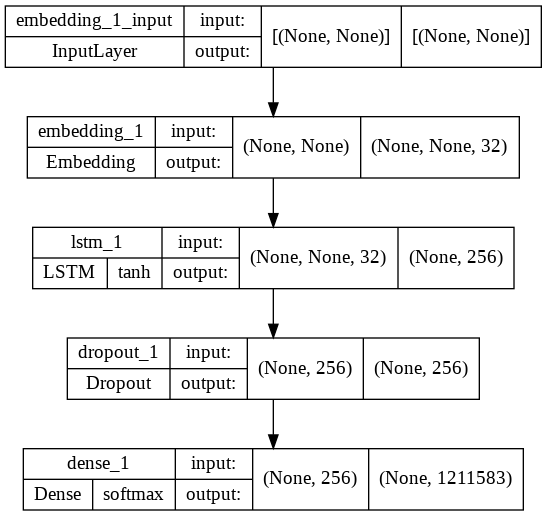

In [9]:
print(dataX.shape)
print(dataY.shape)
print(len(np.unique(dataY)))
# Lets build model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=32, mask_zero=True))
model.add(LSTM(256, input_shape=(dataX.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(units = max(np.unique(dataY[0:10000]))+1, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

In [11]:
## 9. Train and save the best model
filepath = path + "data_l5/LSTM_model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, 
                             save_best_only=True, mode='min')
history = model.fit(dataX[0:10000], dataY[0:10000], epochs=20, batch_size=256, callbacks=[checkpoint])

Epoch 1/20
40/40 [==============================] - ETA: 0s - loss: 7.2565 - accuracy: 0.0908
Epoch 1: loss improved from inf to 7.25650, saving model to drive/MyDrive/code_completion_data/samples//data_l5/LSTM_model.hdf5
40/40 [==============================] - 69s 2s/step - loss: 7.2565 - accuracy: 0.0908
Epoch 2/20
40/40 [==============================] - ETA: 0s - loss: 4.3525 - accuracy: 0.0979
Epoch 2: loss improved from 7.25650 to 4.35247, saving model to drive/MyDrive/code_completion_data/samples//data_l5/LSTM_model.hdf5
40/40 [==============================] - 72s 2s/step - loss: 4.3525 - accuracy: 0.0979
Epoch 3/20
40/40 [==============================] - ETA: 0s - loss: 4.2715 - accuracy: 0.0955
Epoch 3: loss improved from 4.35247 to 4.27150, saving model to drive/MyDrive/code_completion_data/samples//data_l5/LSTM_model.hdf5
40/40 [==============================] - 70s 2s/step - loss: 4.2715 - accuracy: 0.0955
Epoch 4/20
40/40 [==============================] - ETA: 0s - los

In [36]:
import tokenize

with tokenize.open('/content/drive/MyDrive/code_completion_data/Project_CodeNet_Mini/data/p00002/Python/s005515634.py') as f:
    tokens = tokenize.generate_tokens(f.readline)
    for token in tokens:
        print(token)

TokenInfo(type=1 (NAME), string='while', start=(1, 0), end=(1, 5), line='while True:\n')
TokenInfo(type=1 (NAME), string='True', start=(1, 6), end=(1, 10), line='while True:\n')
TokenInfo(type=53 (OP), string=':', start=(1, 10), end=(1, 11), line='while True:\n')
TokenInfo(type=4 (NEWLINE), string='\n', start=(1, 11), end=(1, 12), line='while True:\n')
TokenInfo(type=5 (INDENT), string='    ', start=(2, 0), end=(2, 4), line='    try:\n')
TokenInfo(type=1 (NAME), string='try', start=(2, 4), end=(2, 7), line='    try:\n')
TokenInfo(type=53 (OP), string=':', start=(2, 7), end=(2, 8), line='    try:\n')
TokenInfo(type=4 (NEWLINE), string='\n', start=(2, 8), end=(2, 9), line='    try:\n')
TokenInfo(type=5 (INDENT), string='        ', start=(3, 0), end=(3, 8), line='        a, b = map(int, input().split())\n')
TokenInfo(type=1 (NAME), string='a', start=(3, 8), end=(3, 9), line='        a, b = map(int, input().split())\n')
TokenInfo(type=53 (OP), string=',', start=(3, 9), end=(3, 10), line=' 

In [ ]:
all_files = glob.glob('/content/drive/MyDrive/code_completion_data/Project_CodeNet/data/*/Python/*.py')

In [33]:
print(len(all_files))
np.savetxt('/content/drive/MyDrive/code_completion_data/Project_CodeNet/all_py_files.txt', X = all_files, delimiter=',', comments='', fmt='%s')

182103
/content/drive/MyDrive/code_completion_data/Project_CodeNet/data/p02709/Python/s820929619.py


In [30]:
all_files_mini = glob.glob('/content/drive/MyDrive/code_completion_data/Project_CodeNet_Mini/data/*/Python/*.py')
np.savetxt('/content/drive/MyDrive/code_completion_data/Project_CodeNet_Mini/all_py_files.txt', X = all_files_mini, delimiter=',', comments='', fmt='%s')
len(all_files_mini)

1600

In [43]:
def tokenize_and_save(dir_name):
  tokenizerD = Tokenizer(
    num_words=10000,
    filters='',
    lower=True, split=' ', char_level=False, oov_token="<UNK>",
    document_count=0
  )
  
  # Assumes a file with all_py_files.txt name
  file_index = 1
  with open(dir_name + 'all_py_files.txt') as dir_f:
    for py_file in dir_f.readlines():
      print(str(file_index) + ' - ' + py_file)
      file_index = file_index + 1
      with tokenize.open(py_file.strip()) as f:
        try:
          tokens = [tok.string for tok in tokenize.generate_tokens(f.readline)]
          tokenizerD.fit_on_texts(tokens)
        except:
          pass 

    tokenizer_json = tokenizerD.to_json()
    with open(dir_name + 'tokenizer.json', 'w') as f:
      json.dump(tokenizer_json, f)

    print('Total tokenizer vocabulary {}'.format(len(tokenizerD.word_index)))


tokenize_and_save('/content/drive/MyDrive/code_completion_data/Project_CodeNet_Mini/')

1 - /content/drive/MyDrive/code_completion_data/Project_CodeNet_Mini/data/p03001/Python/s830272501.py

2 - /content/drive/MyDrive/code_completion_data/Project_CodeNet_Mini/data/p03001/Python/s841449118.py

3 - /content/drive/MyDrive/code_completion_data/Project_CodeNet_Mini/data/p03001/Python/s486213753.py

4 - /content/drive/MyDrive/code_completion_data/Project_CodeNet_Mini/data/p03001/Python/s632590194.py

5 - /content/drive/MyDrive/code_completion_data/Project_CodeNet_Mini/data/p03001/Python/s120870043.py

6 - /content/drive/MyDrive/code_completion_data/Project_CodeNet_Mini/data/p03001/Python/s934153240.py

7 - /content/drive/MyDrive/code_completion_data/Project_CodeNet_Mini/data/p03001/Python/s094796135.py

8 - /content/drive/MyDrive/code_completion_data/Project_CodeNet_Mini/data/p03001/Python/s304338891.py

9 - /content/drive/MyDrive/code_completion_data/Project_CodeNet_Mini/data/p03001/Python/s686249743.py

10 - /content/drive/MyDrive/code_completion_data/Project_CodeNet_Mini/dat

In [45]:
with open('/content/drive/MyDrive/code_completion_data/Project_CodeNet_Mini/tokenizer.json') as f:
  json_string = json.load(f)

tokenizer_mini = keras.preprocessing.text.tokenizer_from_json(
    json_string
)

tokenizer_mini.word_index

{'<UNK>': 1,
 '\n': 2,
 '(': 3,
 ')': 4,
 '=': 5,
 ':': 6,
 ',': 7,
 '.': 8,
 '[': 9,
 ']': 10,
 'i': 11,
 'a': 12,
 'x': 13,
 'print': 14,
 'input': 15,
 'y': 16,
 '==': 17,
 'int': 18,
 'n': 19,
 '*': 20,
 'if': 21,
 '1': 22,
 '0': 23,
 'in': 24,
 'for': 25,
 's': 26,
 'b': 27,
 'w': 28,
 'h': 29,
 '2': 30,
 '-': 31,
 'split': 32,
 'r': 33,
 'ans': 34,
 'else': 35,
 'range': 36,
 'map': 37,
 '+': 38,
 '/': 39,
 'import': 40,
 'math': 41,
 '%': 42,
 'list': 43,
 'len': 44,
 '"': 45,
 'pi': 46,
 'str': 47,
 'def': 48,
 'l': 49,
 'append': 50,
 'and': 51,
 'return': 52,
 'elif': 53,
 'max': 54,
 'sys': 55,
 '+=': 56,
 '#': 57,
 'c': 58,
 "'1'": 59,
 'while': 60,
 'gcd': 61,
 '!=': 62,
 'float': 63,
 '"1"': 64,
 '""': 65,
 '>': 66,
 "'": 67,
 'join': 68,
 "''": 69,
 'm': 70,
 '<': 71,
 'stdin': 72,
 'min': 73,
 'format': 74,
 'true': 75,
 't': 76,
 'or': 77,
 'from': 78,
 'num': 79,
 'replace': 80,
 "'9'": 81,
 'reverse': 82,
 'self': 83,
 'main': 84,
 'raw_input': 85,
 'd': 86,
 'break'

In [ ]:
tokenize_and_save('/content/drive/MyDrive/code_completion_data/Project_CodeNet/')

Streaming output truncated to the last 5000 lines.
95560 - /content/drive/MyDrive/code_completion_data/Project_CodeNet/data/p03261/Python/s511085266.py

95561 - /content/drive/MyDrive/code_completion_data/Project_CodeNet/data/p03261/Python/s837282019.py

95562 - /content/drive/MyDrive/code_completion_data/Project_CodeNet/data/p03261/Python/s690681965.py

95563 - /content/drive/MyDrive/code_completion_data/Project_CodeNet/data/p03261/Python/s930919405.py

95564 - /content/drive/MyDrive/code_completion_data/Project_CodeNet/data/p03261/Python/s372014302.py

95565 - /content/drive/MyDrive/code_completion_data/Project_CodeNet/data/p03261/Python/s752051479.py

95566 - /content/drive/MyDrive/code_completion_data/Project_CodeNet/data/p03261/Python/s070717616.py

95567 - /content/drive/MyDrive/code_completion_data/Project_CodeNet/data/p03261/Python/s007546350.py

95568 - /content/drive/MyDrive/code_completion_data/Project_CodeNet/data/p03261/Python/s367477705.py

95569 - /content/drive/MyDrive/

In [ ]:
with open('/content/drive/MyDrive/code_completion_data/Project_CodeNet/tokenizer.json') as f:
  json_string = json.load(f)

tokenizer_full = keras.preprocessing.text.tokenizer_from_json(
    json_string
)

tokenizer_full.word_index